AdaBoost trial
Accuracy: 0.596816976127321
f1 score: 0.7314487632508834
              precision    recall  f1-score   support

           0       0.43      0.12      0.19       146
           1       0.62      0.90      0.73       231

    accuracy                           0.60       377
   macro avg       0.52      0.51      0.46       377
weighted avg       0.54      0.60      0.52       377



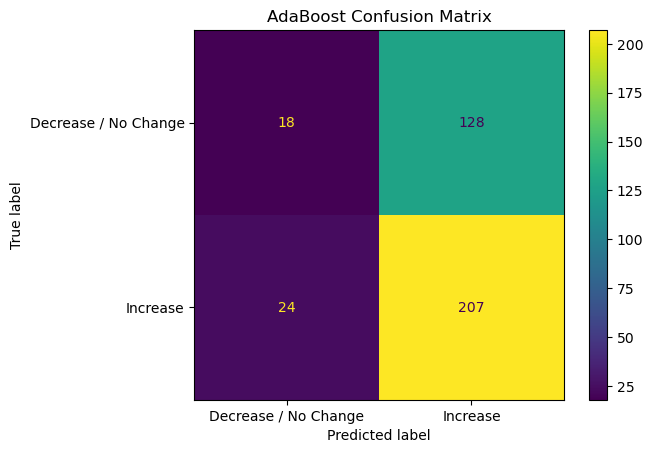

Random guess trial
Accuracy: 0.46949602122015915
f1 score: 0.5283018867924528
              precision    recall  f1-score   support

           0       0.35      0.45      0.39       146
           1       0.58      0.48      0.53       231

    accuracy                           0.47       377
   macro avg       0.47      0.47      0.46       377
weighted avg       0.49      0.47      0.48       377



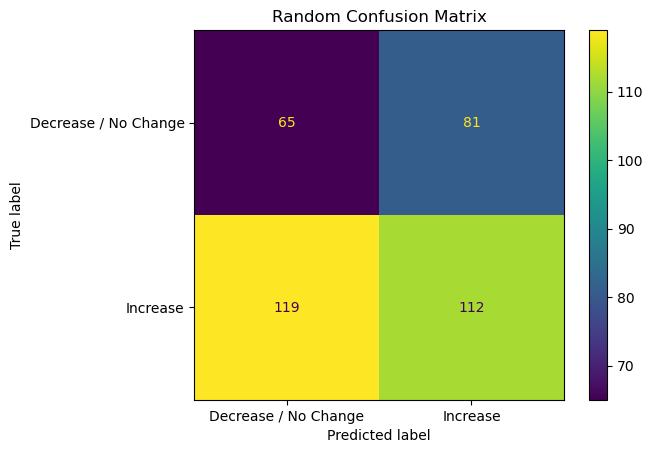

"To the moon!" trial
Accuracy: 0.6127320954907162
f1 score: 0.7598684210526315 


Fold 0: 2218 samples in training set and 159 samples in test set
Fold 1: 2218 samples in training set and 159 samples in test set
Fold 2: 2218 samples in training set and 159 samples in test set
Fold 3: 2218 samples in training set and 159 samples in test set
Fold 4: 2218 samples in training set and 159 samples in test set
Fold 5: 2218 samples in training set and 159 samples in test set
Fold 6: 2218 samples in training set and 159 samples in test set
Fold 7: 2219 samples in training set and 158 samples in test set
Fold 8: 2219 samples in training set and 158 samples in test set
Fold 9: 2219 samples in training set and 158 samples in test set
Fold 10: 2219 samples in training set and 158 samples in test set
Fold 11: 2219 samples in training set and 158 samples in test set
Fold 12: 2219 samples in training set and 158 samples in test set
Fold 13: 2219 samples in training set and 158 samples in test set
Fold

In [4]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

##
#initial feature and label setup

data = pd.read_csv('berkshire_hathaway_data.csv')

#All given features
X_0 = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

X = np.ndarray((X_0.shape[0], 4))

#change X array
trend_range = 30
for i in range (0, X_0.shape[0]):
    #Range
    X[i, 0] = X_0[i, 1] - X_0[i, 2]
    #Volume
    X[i, 1] = X_0[i, 5]
    #Change
    X[i, 2] = X_0[i, 0] - X_0[i, 4]
    #Trend
    X[i, 3] = 0
    if (i > trend_range): 
        for j in range (0, trend_range):
            if (X[i-(trend_range-j), 2] > 0): X[i, 3] += 0.5
            else: X[i, 3] -= 0.5

#determine prediction range
y1 = data[['N. D. C.']].values
y5 = data[['Five Out']].values
y30 = data[['Thirty Out']].values

y_raw = y5


#turn y_train from float value to binary classification (1 = increase)
y_clas = []
for i in range(0, len(y_raw)):
    if (y_raw[i] > X_0[i][4]): y_clas.append(1)
    else: y_clas.append(0)


##########################################################
#Single trial, like in midterm report
split_point = 2000
X_train = X[:split_point]
X_test = X[split_point:]
X_0_train = X_0[:split_point]
X_0_test = X_0[split_point:]
y_train = y_clas[:split_point]
y_test = y_clas[split_point:]

#AdaBoost
btree = DecisionTreeClassifier(max_depth = 5)
ada = AdaBoostClassifier(estimator = btree, algorithm = 'SAMME', n_estimators = 1000, learning_rate = 3.5)
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
print("AdaBoost trial")
print(f"Accuracy: {accuracy_score(y_test, y_ada)}")
print("f1 score:", f1_score(y_test, y_ada))
print(classification_report(y_test, y_ada))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_ada, display_labels=['Decrease / No Change', 'Increase'])
plt.title("AdaBoost Confusion Matrix")
plt.show()

#Random Guess
rng = np.random.default_rng()
random_guess = rng.integers(2, size = len(y_test))
print("Random guess trial")
print(f"Accuracy: {accuracy_score(y_test, random_guess)}")
print("f1 score:", f1_score(y_test, random_guess))
print(classification_report(y_test, random_guess))
disp = ConfusionMatrixDisplay.from_predictions(y_test, random_guess, display_labels=['Decrease / No Change', 'Increase'])
plt.title("Random Confusion Matrix")
plt.show()

#To The Moon!
ttm = np.ones(len(y_test))
print("\"To the moon!\" trial")
print(f"Accuracy: {accuracy_score(y_test, ttm)}")
print("f1 score:", f1_score(y_test, ttm), "\n\n")


########################################################################
#Use K-folds validation
kf = KFold(n_splits = 15, shuffle = True, random_state = 325)
ada_acc = []
ada_f1 = []
rand_acc = []
rand_f1 = []
ttm_acc = []
ttm_f1 = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    print(f"Fold {i}: {len(train_index)} samples in training set and {len(test_index)} samples in test set")
    for index in train_index:
        X_train.append(X[index])
        y_train.append(y_clas[index])
    for index in test_index:    
        X_test.append(X[index])
        y_test.append(y_clas[index])

    btree = DecisionTreeClassifier(max_depth = 2)
    ada = AdaBoostClassifier(estimator = btree, algorithm = 'SAMME', n_estimators = 1000, learning_rate = 3.5)
    ada.fit(X_train, y_train)
    y_ada = ada.predict(X_test)
    rng = np.random.default_rng()
    random_guess = rng.integers(2, size = len(y_test))
    ttm = np.ones(len(y_test))
    ada_acc.append(accuracy_score(y_test, y_ada))
    ada_f1.append(f1_score(y_test, y_ada))
    rand_acc.append(accuracy_score(y_test, random_guess))
    rand_f1.append(f1_score(y_test, random_guess))
    ttm_acc.append(accuracy_score(y_test, ttm))
    ttm_f1.append(f1_score(y_test, ttm))
    #Include these for more info
    ###print(f"   AdaBoost: Accuracy of {np.round(accuracy_score(y_test, y_ada), 2)}, f1 score of {np.round(f1_score(y_test, y_ada), 2)}")
    ###print(f"   Random Guess: Accuracy of {np.round(accuracy_score(y_test, random_guess), 2)}, f1 score of {np.round(f1_score(y_test, random_guess), 2)}")
    ###print(f"   TTM: Accuracy of {np.round(accuracy_score(y_test, ttm), 2)}, f1 score of {np.round(f1_score(y_test, ttm), 2)}")

print("\n\nAverage AdaBoost accuracy:", np.round(np.mean(ada_acc), 2))
print("Average AdaBoost f1 score:", np.round(np.mean(ada_f1), 2))
print("Average random accuracy:", np.round(np.mean(rand_acc), 2))
print("Average random f1 score:", np.round(np.mean(rand_f1), 2))
print("Average ttm accuracy:", np.round(np.mean(ttm_acc), 2))
print("Average ttm f1 score:", np.round(np.mean(ttm_f1), 2))